In [1]:
# Packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
from mayavi.mlab import plot3d
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf')
from lifelines import KaplanMeierFitter, NelsonAalenFitter
from plot_functions import create_polar_axis
axes = create_polar_axis()

In [3]:
# Read in main patient database
uncut_patients_data = pd.read_csv('/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/patient_database/All_patient_data_no_NA.csv')
fraction_16 = pd.read_csv('/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/patient_database/16_fractions.csv')

In [35]:
# fraction_16[['patientid', 'recur_status', 'time_followup_recurrence', 'gleason_grade', 'risk', 'primary_prescribed_fractions', 'age_start_treatment']]
# fraction_16.rename(index=str, columns={"patientid": "patientList", "recur_status": "recurrence", "gleason_grade": "grade", "time_followup_recurrence": "timeToEvent", "age_start_treatment": "age", "primary_prescribed_fractions": "fractions"}, inplace=True)
uncut_patients_data.head(n=1)

,patientNumber,patientList,recurrence,fractions,grade,risk,timeToEvent,volumeContour,volumeContourAuto,volumeContourDifference,DSC,volumeRatio
0,1.0,196708754.0,0.0,19.0,8.0,High,5.071233,83.31971,65.385956,17.933754,0.860675,1.27427532


In [58]:
combined_uncute = pd.concat([uncut_patients_data,fraction_16])
combined_uncute = combined_uncute[["timeToEvent", "recurrence", "fractions", "volumeRatio", "DSC", "volumeContourDifference", "volumeContourAuto", "volumeContour", "grade", "risk", "patientList", "age"]]
combined_uncute.shape

(1212, 12)

In [59]:
combined_uncute.drop_duplicates(['patientList'],inplace=True)

In [74]:
patient_age = pd.read_csv('/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/patient_database/patientAges.csv')
combined_uncute.merge(patient_age, 'outer', 'patientList').head()
combined_uncute.shape

(824, 12)

In [70]:
cd /Users/Tom/PycharmProjects/Contour-Analysis/Code

/Users/Tom/PycharmProjects/Contour-Analysis/Code


In [75]:
from LocalCombined import cuts_from_ct_scans

In [76]:
clean_database = cuts_from_ct_scans(combined_uncute)
clean_database.shape

(694, 12)

In [81]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(clean_database[['age','fractions','patientList']])

      age  fractions  patientList
0     NaN       19.0  196708754.0
1     NaN       19.0  199002410.0
2     NaN       19.0  199200283.0
3     NaN       19.0  199600292.0
4     NaN       19.0  199808975.0
5     NaN       19.0  200308903.0
6     NaN       19.0  200500393.0
7     NaN       19.0  200504360.0
8     NaN       19.0  200510956.0
9     NaN       19.0  200601919.0
10    NaN       19.0  200602861.0
11    NaN       19.0  200603302.0
12    NaN       19.0  200606379.0
13    NaN       19.0  200608359.0
14    NaN       19.0  200608418.0
15    NaN       19.0  200609629.0
16    NaN       19.0  200703514.0
17    NaN       19.0  200704432.0
19    NaN       19.0  200710716.0
20    NaN       19.0  200710807.0
21    NaN       19.0  200711106.0
22    NaN       19.0  200711520.0
23    NaN       19.0  200711546.0
24    NaN       19.0  200712400.0
25    NaN       19.0  200712630.0
26    NaN       19.0  200800239.0
27    NaN       19.0  200800250.0
28    NaN       19.0  200800425.0
29    NaN     

In [4]:
clean_patients_data.head(n=10)

,timeToEvent,recurrence,fractions,stage,grade,risk,volumeContour,volumeContourAuto,volumeContourDifference,DSC,volumeRatio,mean,sd,patientList
0,0.849315,1,19,T3,9,High,60.257812,18.373535,41.884277,0.414799,3.279598,0.732699,0.724895,200900710
1,0.983562,1,19,T2,7,High,38.241211,26.099121,12.142090,0.788471,1.465230,0.154375,0.196008,200911474
2,0.994521,1,19,T1C,9,High,37.221680,23.106445,14.115234,0.723485,1.610879,0.276781,0.363447,200805314
3,1.095890,1,19,T3A,7,High,39.568359,27.905273,11.663086,0.739351,1.417953,0.118300,0.320738,200806929
4,1.238356,1,19,T3,9,High,36.149117,23.459923,12.689194,0.771516,1.540888,0.325353,0.204268,201002873
5,1.271233,1,19,T3,9,High,45.333984,39.238770,6.095215,0.888023,1.155337,0.127031,0.153324,200903652
6,1.397260,1,19,T3B,7,High,52.510254,37.951172,14.559082,0.774447,1.383627,0.181181,0.342483,200909554
7,1.419178,1,19,T3a,7,High,38.779713,35.995556,2.784157,0.906252,1.077347,0.112131,0.187214,201005411
8,1.438356,1,19,T3b,7,High,29.828659,20.057688,9.770971,0.750989,1.487143,0.219948,0.275781,201202325
9,1.457534,1,19,T3,7,High,33.785156,32.822754,0.962402,0.873392,1.029321,0.006125,0.246160,200609629


In [5]:
# Add Covariates
psa_data = pd.read_csv('/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/psa_patients.csv')
age_data = pd.read_csv('/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/patientAges.csv')

In [6]:
# Merge covariates using patient ID
merged_patient_data = pd.merge(clean_patients_data, psa_data, how='inner', on='patientList')

In [7]:
merged_patient_data = pd.merge(merged_patient_data, age_data, how='inner', on='patientList')
merged_patient_data.head(n=1)

,timeToEvent,recurrence,fractions,stage,grade,risk,volumeContour,volumeContourAuto,volumeContourDifference,DSC,volumeRatio,mean,sd,patientList,psa,age
0,0.849315,1,19,T3,9,High,60.257812,18.373535,41.884277,0.414799,3.279598,0.732699,0.724895,200900710,33.6,60


In [8]:
# rename risk to High, Intermediate, Low
merged_patient_data['risk'] = merged_patient_data['risk'].apply(lambda x: 'Low' if x == 'Low' else ('High' if x == 'High' else 'Intermediate'))

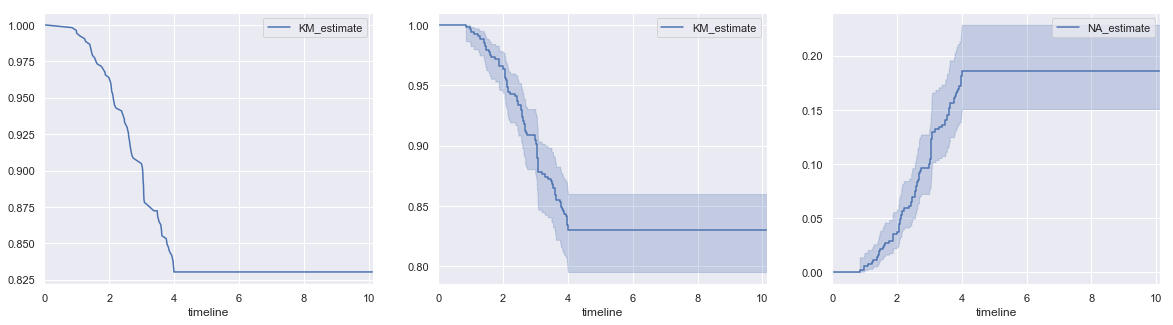

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

T = merged_patient_data["timeToEvent"]
E = merged_patient_data["recurrence"]

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)
ax1 = kmf.survival_function_.plot(ax=ax1)
ax2 = kmf.plot(ax=ax2)
naf = NelsonAalenFitter()
naf.fit(T,event_observed=E)
ax3 = naf.plot(ax=ax3)

In [10]:
# Survival functions
from LocalCombined import survival_analysis_fractions, survival_analysis_dsc

SyntaxError: invalid character in identifier (LocalCombined.py, line 232)

In [11]:
survival_analysis_fractions(merged_patient_data)

NameError: name 'survival_analysis_fractions' is not defined

In [12]:
survival_analysis_dsc(merged_patient_data,'DSC')

NameError: name 'survival_analysis_dsc' is not defined

In [13]:
survival_analysis_dsc(merged_patient_data,'volumeContourDifference')

NameError: name 'survival_analysis_dsc' is not defined

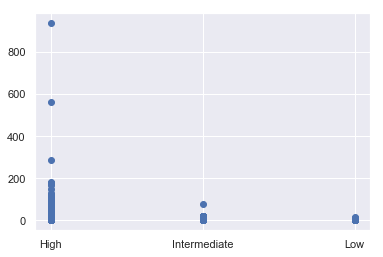

In [14]:
plt.scatter(merged_patient_data['risk'],merged_patient_data['psa'])

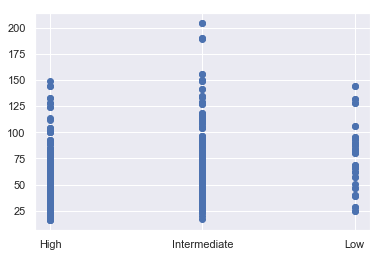

In [15]:
plt.scatter(merged_patient_data['risk'],merged_patient_data['volumeContour'])

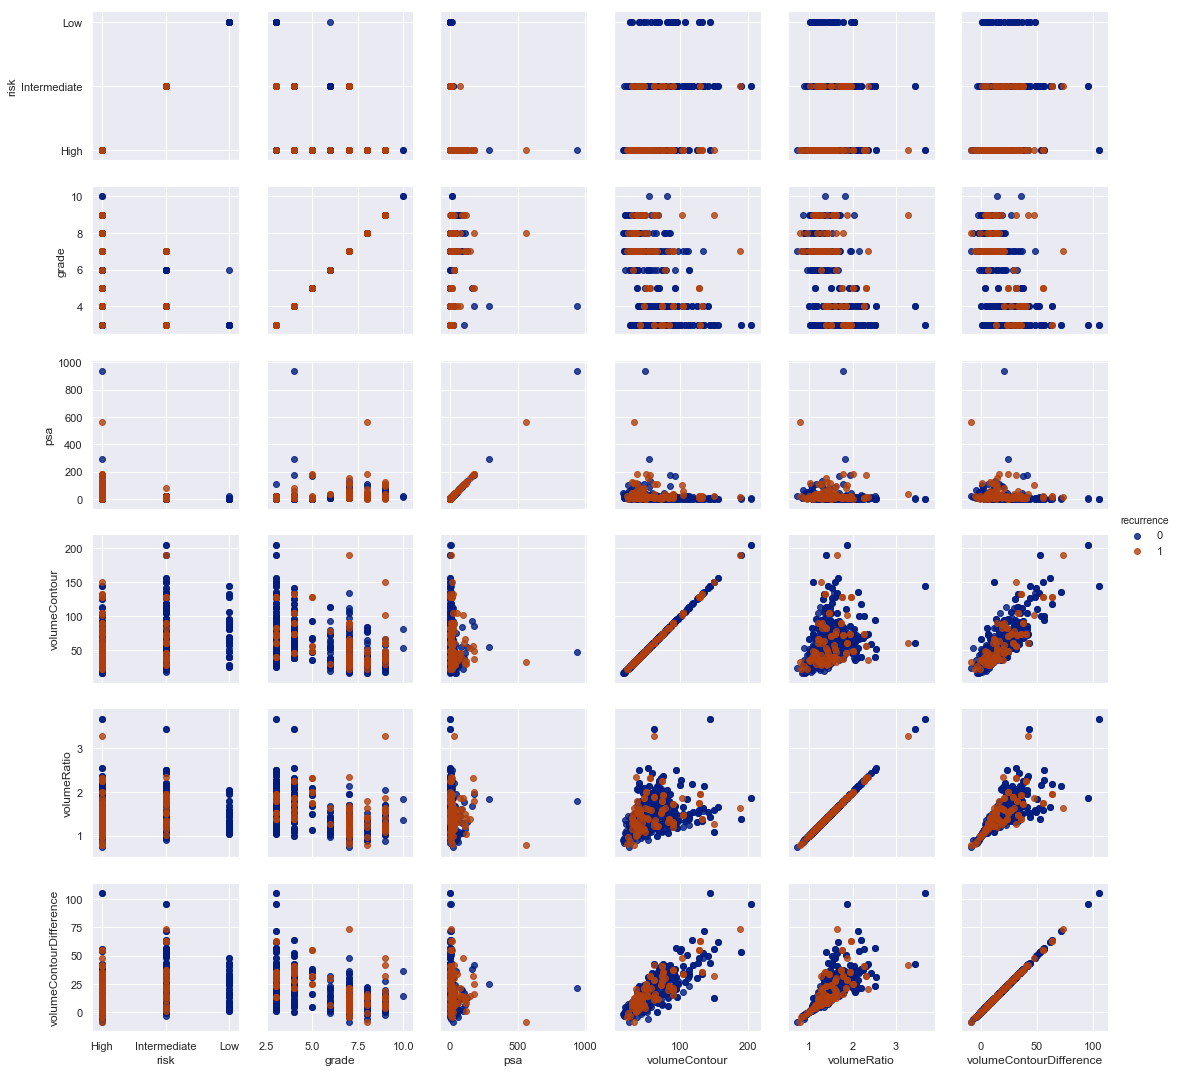

In [16]:
g = sns.PairGrid(merged_patient_data, vars=['risk', 'grade', 'psa', 'volumeContour', 'volumeRatio', 'volumeContourDifference'],
                     hue='recurrence', palette='dark')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

plt.show(block=True)

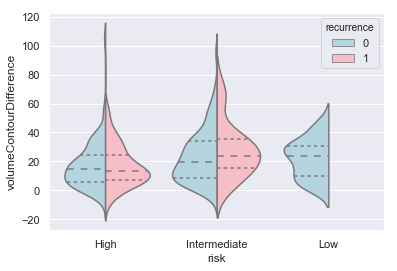

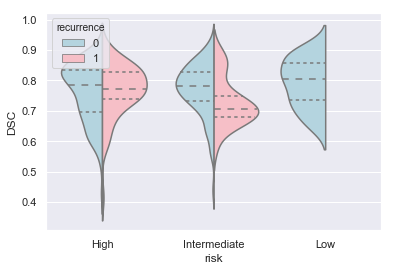

In [17]:
rec = (merged_patient_data.recurrence == 'Rec')
no_rec = (merged_patient_data.recurrence == 'No Rec')

with sns.axes_style(style=None):
    sns.violinplot("risk", "volumeContourDifference", hue="recurrence", data=merged_patient_data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);
plt.savefig("/Users/Tom/Desktop/Mphy_Report/Figures/violinplt_voldiff.pdf", bbox_inches="tight")
plt.show()
with sns.axes_style(style=None):
    sns.violinplot("risk", "DSC", hue="recurrence", data=merged_patient_data,
               split=True, inner="quartile",
               palette=["lightblue", "lightpink"]);
plt.savefig("/Users/Tom/Desktop/Mphy_Report/Figures/violinplt_dsc.pdf", bbox_inches="tight")
plt.show()


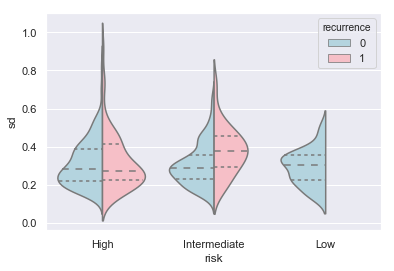

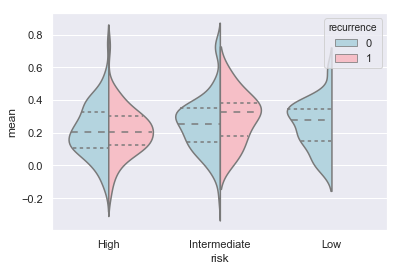

In [18]:
with sns.axes_style(style=None):
    sns.violinplot("risk", "sd", hue="recurrence", data=merged_patient_data,
               split=True, inner="quartile",
               palette=["lightblue", "lightpink"]);
plt.savefig("/Users/Tom/Desktop/Mphy_Report/Figures/violinplt_sd.pdf", bbox_inches="tight")
plt.show()

with sns.axes_style(style=None):
    sns.violinplot("risk", "mean", hue="recurrence", data=merged_patient_data,
               split=True, inner="quartile",
               palette=["lightblue", "lightpink"]);
plt.show()

In [19]:
# Import test functions
from significance_test import global_statistical_analysis

global_statistical_analysis(merged_patient_data)

#rec: 89, #n_rec: 436
Vdiff: p_value(rec=/=n_rec): 0.859600 p_value(rec<n_rec): 0.435200 p_value(rec>n_rec): 0.564800
DSC: p_value(rec=/=n_rec): 0.355800 p_value(rec<n_rec): 0.175700 p_value(rec>n_rec): 0.824300
VRatio: p_value(rec=/=n_rec): 0.889300 p_value(rec<n_rec): 0.562800 p_value(rec>n_rec): 0.437200


In [20]:
# Analysing global variables by risk
high_risk_patients = merged_patient_data.groupby("risk").get_group("High")
global_statistical_analysis(high_risk_patients)
int_risk_patients = merged_patient_data.groupby("risk").get_group("Intermediate")
global_statistical_analysis(int_risk_patients)

#rec: 65, #n_rec: 209
Vdiff: p_value(rec=/=n_rec): 0.975900 p_value(rec<n_rec): 0.525400 p_value(rec>n_rec): 0.474600
DSC: p_value(rec=/=n_rec): 0.490800 p_value(rec<n_rec): 0.748600 p_value(rec>n_rec): 0.251400
VRatio: p_value(rec=/=n_rec): 0.393200 p_value(rec<n_rec): 0.202900 p_value(rec>n_rec): 0.797100
#rec: 24, #n_rec: 178
Vdiff: p_value(rec=/=n_rec): 0.308000 p_value(rec<n_rec): 0.846600 p_value(rec>n_rec): 0.153400
DSC: p_value(rec=/=n_rec): 0.026200 p_value(rec<n_rec): 0.016300 p_value(rec>n_rec): 0.983700
VRatio: p_value(rec=/=n_rec): 0.110900 p_value(rec<n_rec): 0.936500 p_value(rec>n_rec): 0.063500


Hello

In [21]:
from significance_test import pymining_t_test, test_superimpose
global_neg_pvalue, global_pos_pvalue, neg_tthresh, pos_tthresh, t_value_map = pymining_t_test(merged_patient_data)

100%|██████████| 1000/1000 [02:40<00:00,  6.15it/s]


In [22]:
from AllPatients import separate_by_recurrence
from LocalCombined import make_average_field

rec_patients, non_rec_patients = separate_by_recurrence(merged_patient_data)
mean_map1, var_map1, sd_map1 = make_average_field(rec_patients, '/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/deltaRMaps')
mean_map2, var_map2, sd_map2 = make_average_field(non_rec_patients, '/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/deltaRMaps')

SyntaxError: invalid character in identifier (LocalCombined.py, line 232)

NameError: name 'mean_map1' is not defined

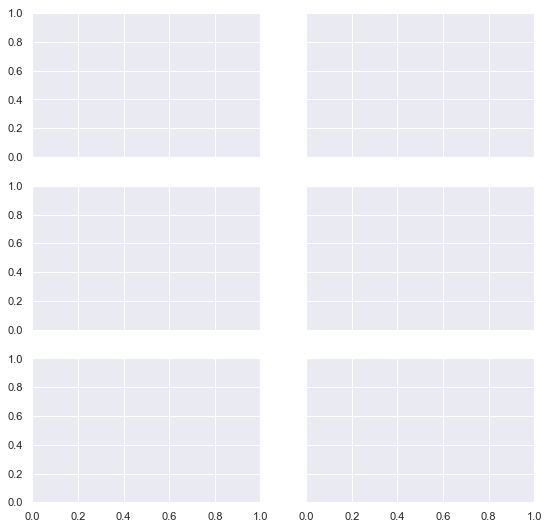

In [23]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(9,9), sharex='col', sharey='row')
heat_map = sns.heatmap(mean_map1.values, center=0, xticklabels=axes[0], yticklabels=axes[1], cmap='RdBu', ax=ax1)
heat_map.set(ylabel='Theta, $\dot{\Theta}$', xlabel='Azimutal, $\phi$', title='mean patient map with recurrence')
heat_map = sns.heatmap(sd_map1.values, center=0, xticklabels=axes[0], vmax=1, yticklabels=axes[1], cmap='RdBu', ax=ax2)
heat_map.set(ylabel='Theta, $\dot{\Theta}$', xlabel='Azimutal, $\phi$', title='std patient map with recurrence')

heat_map = sns.heatmap(mean_map2.values, center=0, xticklabels=axes[0], yticklabels=axes[1], cmap='RdBu', ax=ax3)
heat_map.set(ylabel='Theta, $\dot{\Theta}$', xlabel='Azimutal, $\phi$', title='mean patient map without recurrence')
heat_map = sns.heatmap(sd_map2.values, center=0, xticklabels=axes[0], vmax=1, yticklabels=axes[1], cmap='RdBu', ax=ax4)
heat_map.set(ylabel='Theta, $\dot{\Theta}$', xlabel='Azimutal, $\phi$', title='std patient map without recurrence')

heat_map = sns.heatmap((mean_map1-mean_map2).values, center=0, xticklabels=axes[0], yticklabels=axes[1], cmap='RdBu', ax=ax5)
heat_map.set(ylabel='Theta, $\dot{\Theta}$', xlabel='Azimutal, $\phi$', title='mean difference patient map')
heat_map = sns.heatmap(np.sqrt(var_map1+var_map2).values, center=0, vmax=1, xticklabels=axes[0], yticklabels=axes[1], cmap='RdBu', ax=ax6)
heat_map.set(ylabel='Theta, $\dot{\Theta}$', xlabel='Azimutal, $\phi$', title='std of difference patient map with recurrence')


In [24]:
print("Global positive p value: %s. Global negative p values: %s." % (global_pos_pvalue, global_neg_pvalue))

Global positive p value: 0.0. Global negative p values: 0.233.


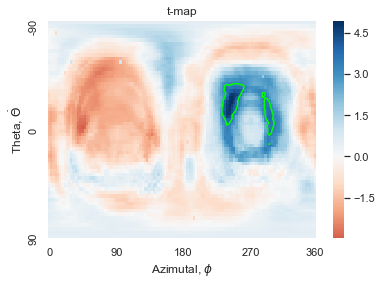

In [25]:
# Contour significant regions of t map
test_superimpose(t_value_map[0],pos_tthresh,neg_tthresh)

In [26]:
# Non-parametric testing
from significance_test import mann_whitney_test_statistic
U_test_map, p_value_map = mann_whitney_test_statistic(merged_patient_data)
critical_statistic_values = np.percentile(p_value_map.flatten(), [5, 95])

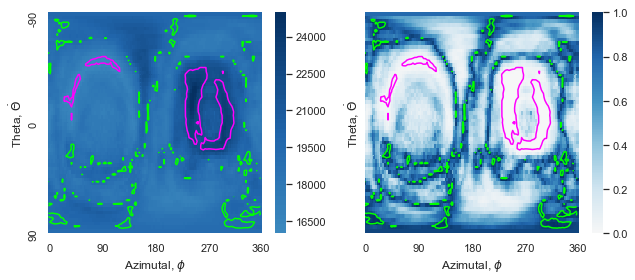

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4), sharex='col', sharey='row')

ax1.contour(p_value_map, levels=critical_statistic_values, colors=['magenta', 'lime'])
plt.gca()
heat_map = sns.heatmap(U_test_map, center=0, xticklabels=axes[0], yticklabels=axes[1], cmap='RdBu', ax=ax1)
heat_map.set(ylabel='Theta, $\dot{\Theta}$', xlabel='Azimutal, $\phi$', title='')

ax2.contour(p_value_map, levels=critical_statistic_values, colors=['magenta', 'lime'])
plt.gca()
heat_map = sns.heatmap(p_value_map, center=0, xticklabels=axes[0], yticklabels=axes[1], cmap='RdBu', ax=ax2)
heat_map.set(ylabel='Theta, $\dot{\Theta}$', xlabel='Azimutal, $\phi$', title='')

# f.subplots_adjust(wspace=0.2)
plt.tight_layout()

plt.show()

In [28]:
age_cox = pd.read_csv(r'/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/test_results/age.csv')
fraction_cox = pd.read_csv(r'/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/test_results/fractions.csv')
riskLH_cox = pd.read_csv(r'/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/test_results/riskLowHigh.csv')
riskLI_cox = pd.read_csv(r'/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/test_results/riskLowInt.csv')
vol_cox = pd.read_csv(r'/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/test_results/autoVolume.csv')

/Users/Tom/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/Users/Tom/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/Users/Tom/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


NameError: name 'risk_cox' is not defined

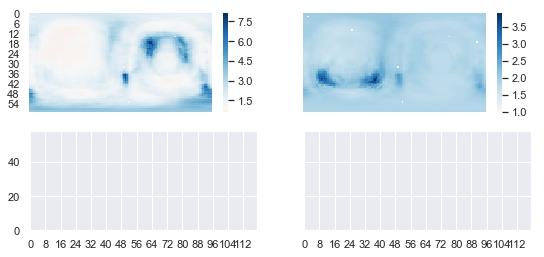

In [29]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,4) ,sharex='col', sharey='row')

ax1.contour(age_cox.values, colors=['magenta', 'lime'], levels=[np.exp(-1.7313), np.exp(2.3167)])
plt.gca()
heat_map1 = sns.heatmap(age_cox.values, center=1, ax=ax1, cmap='RdBu')
heat_map1.set_xlabel(''); heat_map1.set_ylabel('')


ax2.contour(fraction_cox.values, levels=[np.exp(0), np.exp(1.8463)], colors=['magenta', 'lime'])
plt.gca()
heat_map2 = sns.heatmap(fraction_cox.values, center=1, ax=ax2, cmap='RdBu')
heat_map2.set_xlabel(''); heat_map2.set_ylabel('')

ax3.contour(riskLI_cox.values, levels=[np.exp(-0.6818), np.exp(1.4112)], colors=['magenta', 'lime'])
plt.gca()
heat_map3 = sns.heatmap(risk_cox.values, center=1, ax=ax3, cmap='RdBu')
heat_map3.set_xlabel(''); heat_map3.set_ylabel('')

ax4.contour(vol_cox.values, levels=[np.exp(-0.0131), np.exp(0.0926)], colors=['magenta', 'lime'])
plt.gca()
heat_map4 = sns.heatmap(vol_cox.values, center=1, ax=ax4, cmap='RdBu')
heat_map4.set_xlabel(''); heat_map4.set_ylabel('')

plt.tight_layout()
plt.show()


In [30]:
age_cox = pd.read_csv(r'/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/csv_results_sig/age.csv')
fraction_cox = pd.read_csv(r'/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/csv_results_sig/fractions.csv')
riskLH_cox = pd.read_csv(r'/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/csv_results_sig/riskLowHigh.csv')
riskLI_cox = pd.read_csv(r'/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/csv_results_sig/riskLowInt.csv')
vol_cox = pd.read_csv(r'/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/csv_results_sig/autoVolume.csv')


In [31]:
from significance_test import map_with_thresholds

map_with_thresholds(age_cox.values, name="age_cox_map")
map_with_thresholds(fraction_cox.values, name="frac_cox_map")
map_with_thresholds(riskLH_cox.values, name="riskLH_cox_map")
map_with_thresholds(riskLI_cox.values, name="riskLI_cox_map")
map_with_thresholds(vol_cox.values, name="voldiff_cox_map")

TypeError: map_with_thresholds() got an unexpected keyword argument 'name'

In [32]:
from astropy.coordinates import spherical_to_cartesian
# patient map
map = pd.read_csv(r'/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/AutoMaps/196703818.csv', header=None).values

In [36]:
map.shape
from numpy import pi, sin, cos, mgrid
from collections import namedtuple

In [37]:
# Create the data.

dphi, dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3 + sin(m4*theta)**m5 + cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)

# View it.
from mayavi import mlab
s = mlab.mesh(x, y, z)
mlab.show()

In [49]:
def map_to_cart(spherical_map): 
    m = [] 
    for i in range(60):
    # print(-90 + (i*3))
        for j in range(120):
            # m.append([i*j,i,j])
            x,y,z = spherical_to_cartesian(spherical_map[i][j],np.radians(-90 + (i*3)),np.radians(j*3))
            # map_xy.append([x,y,z])
            m.append([x,y,z])
        return np.array(m)

In [50]:
num_array = map_to_cart(map)

In [54]:
def make_coor(n):
    phi, theta = np.mgrid[0:pi-0:n, 0:2 * pi:n]
    Coor = namedtuple('Coor', 'r phi theta x y z')
    r = 1
    x = r * sin(phi) * cos(theta)
    y = r * sin(phi) * sin(theta)
    z = r * cos(phi)
    return Coor(r, phi, theta, x, y, z)

pts=make_coor(15j)

mlab.figure()
mlab.points3d(num_array[:,0], num_array[:,1], num_array[:,2], scale_factor=0.1)
mlab.mesh(pts.x,pts.y,pts.z)
mlab.savefig('spheretest.png')
mlab.show()

##### Returns spherical map to cartesian elements
def map_to_cart(spherical_map):
    m = []
    for i in range(60):
        # print(-90 + (i*3))
        for j in range(120):
            # m.append([i*j,i,j])
            x,y,z = spherical_to_cartesian(spherical_map[i][j],np.radians(-90 + (i*3)),np.radians(j*3))
            # map_xy.append([x,y,z])
            m.append([x,y,z])
    return np.array(m)


In [38]:
num_array = map_to_cart(map)

In [59]:
num_array.shape
num_array[:][2]

array([ 1.30314703e-16,  1.36966272e-17, -2.13992333e+00])

In [60]:
new_shape = num_array.reshape(59,120,3)
new_shape.shape

(59, 120, 3)

In [61]:
num_array[:,0].shape

(7080,)

In [62]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [63]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(num_array[:,0], num_array[:,1], num_array[:,2])
plt.savefig("/Users/Tom/Desktop/Mphy_Report/Figures/prostate_map.pdf", bbox_inches="tight")
plt.show()

<Figure size 720x720 with 1 Axes>

In [64]:
t = map_to_cart(t_value_map[0])
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(t[:,0], t[:,1], t[:,2])
plt.savefig("/Users/Tom/Desktop/Mphy_Report/Figures/prostate_map_diff.pdf", bbox_inches="tight")
plt.show()

<Figure size 720x720 with 1 Axes>

In [2]:
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png')

In [39]:
from mayavi import mlab

In [43]:
num_array

array([[ 1.31009359e-16,  0.00000000e+00, -2.13954520e+00],
       [ 1.30841027e-16,  6.85708764e-18, -2.13972855e+00],
       [ 1.30314703e-16,  1.36966272e-17, -2.13992333e+00],
       ...,
       [ 1.75077486e-01, -2.77295496e-02,  1.68651480e+00],
       [ 1.76288800e-01, -1.85286996e-02,  1.68651480e+00],
       [ 1.77016920e-01, -9.27706367e-03,  1.68651480e+00]])

In [41]:
s = mlab.mesh(num_array[:,0], num_array[:,1], num_array[:,2])
mlab.show()

AssertionError: Array x must be 2 dimensional.